In [8]:
import numpy as np 
import requests
import pickle 
# Add metrics 


# Add references 
## Q Learning 
## QQ Learnin g

In [16]:
def get_results(modelType, epoch):
    path = f"https://itcr-dl.s3.amazonaws.com/doomrl/training/{modelType}/stats/{modelType}-{epoch}.dat"
    r = requests.get(path, allow_redirects=True)
    if r.status_code == 200: 
        open("status.dat", 'wb').write(r.content)
        with open ('status.dat', 'rb') as fp:
            epoch_results = pickle.load(fp)
        return epoch_results 
    print(f'The following link returned {r.status_code}: {path}')
    return False

def get_model_results(modelType, epoch): 
    listOfRewardsPerEpisode = []
    listOfRewardsPerStep = []

    for i in range(epoch + 1): 
        rewards = get_results(modelType, i)
        if rewards: 
            listOfRewardsPerEpisode.append(rewards['mean_episode_reward'])
            listOfRewardsPerStep.append(rewards['mean_step_reward'])
        else: 
            break

    return (np.array(listOfRewardsPerEpisode), np.array(listOfRewardsPerStep))

def get_all_results(listOfModels): 

    for model in listOfModels: 
        listOfRewardsPerEpisode, listOfRewardsPerStep = get_model_results(model['modelType'], model['maxEpoch'])
        model['listOfRewardsPerEpisode'] = listOfRewardsPerEpisode
        model['listOfRewardsPerStep'] = listOfRewardsPerStep

    

In [41]:

listOfModels = [
    {'modelType': 'final.baseline.basic.NO.preprocessing.64', 'maxEpoch': 40, 'modelName': 'Baseline + No PreProcessing', }, 
    {'modelType': 'final.baseline.basic.preprocessing.64', 'maxEpoch': 40, 'modelName': 'Baseline + PreProcessing', }, 
    {'modelType': 'final.improved.basic.no.preprocessing.64', 'maxEpoch': 40, 'modelName': 'Improved + No PreProcessing', }, 
    {'modelType': 'final.improved.basic.preprocessing.64', 'maxEpoch': 40, 'modelName': 'Improved + PreProcessing', }, 
]


get_all_results(listOfModels)

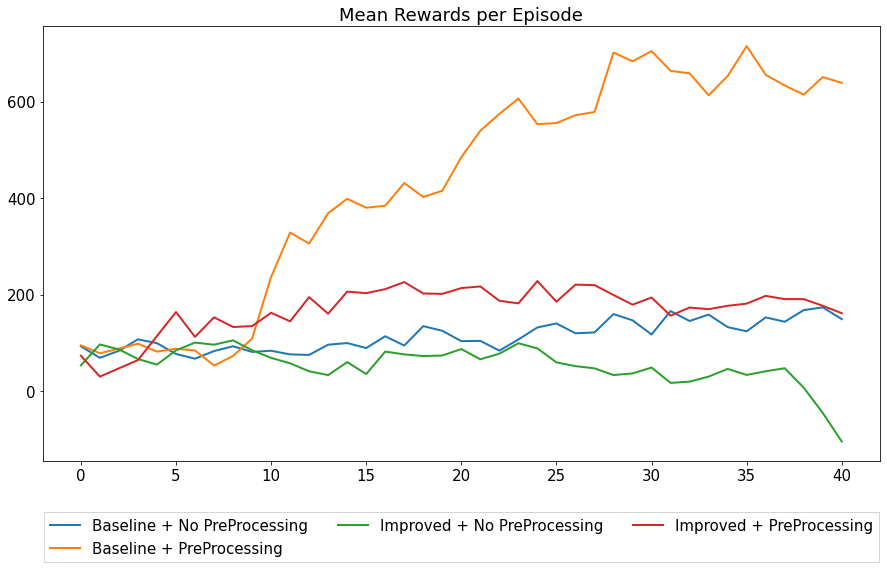

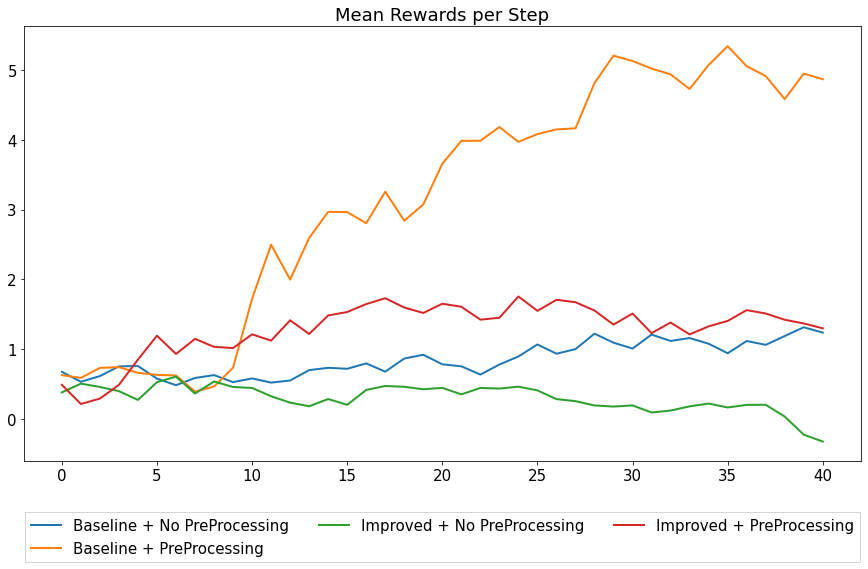

In [42]:
import matplotlib.pyplot as plt

#set font of all elements to size 15
plt.rc('font', size=15) 

def plot_values(graphName, listOfModels, key):

    fig, ax = plt.subplots()
    fig.set_figwidth(15)
    fig.set_figheight(8)

    for i, model in enumerate(listOfModels): 
        
        if key in model: 
            ax.plot(model[key], linewidth=2.0, label=model['modelName'])

    ax.set_title(graphName)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=False, shadow=False, ncol=3)

    plt.show()

plot_values('Mean Rewards per Episode', listOfModels, 'listOfRewardsPerEpisode')
print()
plot_values('Mean Rewards per Step', listOfModels, 'listOfRewardsPerStep')
